<h1>Implementing Logistic Regression from Scratch</h1>
<p>You can take the dataset from <a href='https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/download/gqNqzdSwu7p4knmgywCj%2Fversions%2FOhz2Dynugco5o8aokFXA%2Ffiles%2Fwinequality-red.csv?datasetVersionNumber=2'><i>here</i></a> and paste it in the current working directory.<br>
    Our task is to classify wines as of `good` quality(<b>when quality>6.5</b>) or bad quality(<b>when quality<=6.5</b>) using <b>Logistic regression</b> which outputs `1` for good and `0` for bad.</p>

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
from random import seed
from math import exp

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


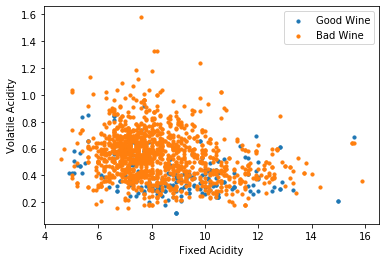

good wines: (217, 12)
bad wines: (1382, 12)


In [4]:
# X = feature values, all the columns except the last column
X = df.iloc[:, :-1]

# y = target values, last column of the data frame
y = df.iloc[:, -1]

#filter out the wines with quality>6.5
good_wine=df[y>6.5]

#filter out the wines with quality<=6.5
bad_wine=df[y<=6.5]

#Plotting with respect to `fixed acidity` and `volatile acidity` features
plt.scatter(good_wine.iloc[:,0], good_wine.iloc[:,1],s=10, label='Good Wine')
plt.scatter(bad_wine.iloc[:,0], bad_wine.iloc[:,1],s=10, label='Bad Wine')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend()
plt.show()
print('good wines:',good_wine.shape)
print('bad wines:',bad_wine.shape)

<h2>Let's see how well Logistic Regression performs on this data</h2>

In [5]:
#Sigmoid function
def sigmoid(x):
    return 1/(1+exp(-x))

<h2>Making Predictions</h2>
<p>Making prediction by taking the weighted linear sum of features of a single training example.<br>
    <b>LOOK LIKE :</b><br>yhat = b0 + b1*x1 + b2*x2 + .. +bn*xn <br>where,<br>
    b0,b1,...,bn : `n+1` coefficients<br>
                        x1, x2, ...,xn : `n` features in a training example<br><br>
    `yhat` is passed through the <i>sigmoid</i> function to get the output between 0 and 1. </p>

In [6]:
def predict(X, coeff):
    yhat=0               
    for i in range(len(X)-1):
        yhat+=coeff[i+1]*X[i]
    yhat+=coeff[0]            #Adding b0
    return sigmoid(yhat)

<h2>Estimating coefficients using <i>Stochastic Gradient Descent</i></h2>
<p>There is one coefficient as weight to every input feature and they are updated in a consistent way,<br>
    <i>b1(t+1) = b1(t) + learning_rate * (y(t) - yhat(t)) * yhat(t) * (1 - yhat(t)) * x1(t)</i><br><br>
    The special coefficient b0, also called <b>intercept</b> or <b>bias</b> is updated in a similar manner except without an input because it is not associated with any input value,<br>
    <i>b0(t+1) = b0(t) + learning_rate * (y(t) - yhat(t)) * yhat(t) * (1 - yhat(t))</i></p>
    

In [79]:
def coefficients_sgd(train, l_rate, epochs):
    coeff=[0 for i in range(len(train[0]))]
    for epoch in range(epochs):
        sum_error=0
        for row in train:
            
            yhat=predict(row, coeff)
            error=row[-1]-yhat
            sum_error+=error**2
            coeff[0]+=l_rate*error*yhat*(1-yhat)
            for i in range(len(train[0])-1):
                coeff[i+1]+=l_rate*error*yhat*(1-yhat)*row[i]
        print('epoch :%d, learning_rate :%.3f, error :%.3f'%(epoch,l_rate,sum_error))
    print('--------------------------------------------')
    return coeff

In [80]:
def logistic_regression(train, test, l_rate, epochs):
    coeff=coefficients_sgd(train, l_rate, epochs)
    predictions=[]
    for data in test:
        yhat=predict(data,coeff)
        yhat=round(yhat)
        predictions.append(yhat)
    return predictions

<h3>Cross Validation split</h3>

<p>We will use k-fold cross validation to estimate the performance of the learned model on unseen data. This means that we will construct and evaluate k models and estimate the performance as the mean model performance. Classification accuracy will be used to evaluate each model. <br>These behaviors are provided in the <i>cross_validation_split()</i>, <i>accuracy_metric()</i> and <i>evaluate_algorithm()</i> helper functions.<br><br>
In simpler words, we will have k batches of training data and we will use these batches to calculate gradient in each iteration.Thus, we would have `k` evaluations of model, that is `k` models and we would consider the mean model performance.</p>

In [81]:
#Splitting the dataset into k folds
def cross_validation_split(dataset, n_batches):
    batches=[]
    batch_size=int(len(dataset)/n_batches)
    dataset_copy=list(dataset)
    for i in range(n_batches):
        a_batch=[]
        while len(a_batch)<batch_size:
            rand_index=randrange(len(dataset_copy))
            a_batch.append(dataset_copy.pop(rand_index))
        batches.append(a_batch)
    return batches

In [82]:
#Preparing data and applying the algorithm using cross-validation split
def evaluate_algorithm(dataset, algorithm, n_batch, l_rate, n_epochs):
    data_split=cross_validation_split(dataset, n_batch)
    print('number of batches',len(data_split))
    scores=[]
    for batch in data_split:
        train_set=list(data_split)
        train_set.remove(batch)     #Taking the entire dataset except the current batch for training
        train_set=sum(train_set,[]) #Flattening the list
        test_set=[]
        actual=[]
        for data in batch:
            data_copy=data          #Test set consist of the current batch of examples
            test_set.append(data_copy)
        actual=[row[-1] for row in batch]
        predicted=algorithm(train_set, test_set, l_rate, n_epochs)
        acc=accuracy(actual, predicted)
        scores.append(acc)
        
    return scores

In [83]:
#Evaluating Accuracy metric
def accuracy(actual,predicted):
    correct=0
    for i in range(len(actual)):
        if actual[i]==predicted[i]:
            correct+=1
    return (correct/len(actual))*100

<h2>Test the Logistic Regression algorithm on the <i>Red wine dataset</i></h2>

In [87]:
n_batch=5   # 4 batches of training data
l_rate=0.01  # Learning rate
n_epochs=10  # Number of epochs
dataset=[]
seed(1)      #To generate same random indexes to access put random training examples in a batch
for i in range(df.shape[0]):
    data=[]
    for col in list(df):
        data.append(df[col][i])
    if data[-1]>6.5:
        data[-1]=1
    else:
        data[-1]=0
    dataset.append(data)


scores=evaluate_algorithm(dataset,logistic_regression, n_batch, l_rate, n_epochs)
print('Scores: %s' % scores)
print('Mean accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

number of batches 5
epoch :0, learning_rate :0.010, error :163.073
epoch :1, learning_rate :0.010, error :165.839
epoch :2, learning_rate :0.010, error :160.284
epoch :3, learning_rate :0.010, error :159.292
epoch :4, learning_rate :0.010, error :159.218
epoch :5, learning_rate :0.010, error :158.771
epoch :6, learning_rate :0.010, error :158.148
epoch :7, learning_rate :0.010, error :157.824
epoch :8, learning_rate :0.010, error :157.600
epoch :9, learning_rate :0.010, error :157.021
--------------------------------------------
epoch :0, learning_rate :0.010, error :153.532
epoch :1, learning_rate :0.010, error :152.964
epoch :2, learning_rate :0.010, error :152.614
epoch :3, learning_rate :0.010, error :152.304
epoch :4, learning_rate :0.010, error :152.071
epoch :5, learning_rate :0.010, error :151.873
epoch :6, learning_rate :0.010, error :151.580
epoch :7, learning_rate :0.010, error :151.206
epoch :8, learning_rate :0.010, error :150.817
epoch :9, learning_rate :0.010, error :151

<h3>You may be thinking: How come accuracy metric is decent despite error being such large?</h3>
    <p>It is because our dataset is unequally distributed, having more number of training instances with label `0` as compared to that with class label `1`.In other words, we have more number of <i>bad wines</i> as compared to the number of <i>good wines.</i><br>Thus, our model learns to provide class label `0` to a greater extent and gets success in labeling test point correctly since the dataset is biased towards a particular class label, although error can't be minimised because of that unequal distribution.</p>